In [1]:
from tensorflow.keras.layers import Dense, InputLayer, Reshape, Conv2D, Flatten, Conv2DTranspose
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train_mod = X_train.astype(float) / 255

In [6]:
X_train_mod.max()

1.0

In [39]:
encoder = Sequential()
encoder.add(InputLayer(input_shape=(28, 28)))
encoder.add(Reshape([28, 28, 1]))
encoder.add(Conv2D(16, 3, activation='relu', strides=2))
encoder.add(Conv2D(8, 3, activation='relu', strides=2))
encoder.add(Flatten())

In [40]:
encoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_9 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 16)        160       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 8)           1160      
_________________________________________________________________
flatten_4 (Flatten)          (None, 288)               0         
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [47]:
decoder = Sequential()
decoder.add(InputLayer(input_shape=(288,)))
decoder.add(Reshape([6, 6, 8]))
decoder.add(Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'))
decoder.add(Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'))
decoder.add(Conv2DTranspose(4, kernel_size=3, strides=1, activation='relu'))
decoder.add(Conv2DTranspose(1, kernel_size=3, strides=1, activation='relu'))
decoder.add(Reshape([28, 28]))


In [48]:
decoder.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_13 (Reshape)         (None, 6, 6, 8)           0         
_________________________________________________________________
conv2d_transpose_22 (Conv2DT (None, 12, 12, 16)        1168      
_________________________________________________________________
conv2d_transpose_23 (Conv2DT (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_transpose_24 (Conv2DT (None, 26, 26, 4)         580       
_________________________________________________________________
conv2d_transpose_25 (Conv2DT (None, 28, 28, 1)         37        
_________________________________________________________________
reshape_14 (Reshape)         (None, 28, 28)            0         
Total params: 4,105
Trainable params: 4,105
Non-trainable params: 0
___________________________________________________

In [49]:
autoencoder = Sequential()
autoencoder.add(InputLayer(input_shape=(28, 28)))
autoencoder.add(encoder)
autoencoder.add(decoder)

In [50]:
autoencoder.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 288)               1320      
_________________________________________________________________
sequential_13 (Sequential)   (None, 28, 28)            4105      
Total params: 5,425
Trainable params: 5,425
Non-trainable params: 0
_________________________________________________________________


In [51]:
autoencoder.compile(optimizer="adam", loss=losses.MeanSquaredError())

In [53]:
autoencoder.fit(X_train_mod, X_train_mod, epochs=10, steps_per_epoch=10)

Epoch 1/10
10/10 [==============================] - 2s 202ms/step - loss: 0.0302
Epoch 2/10
10/10 [==============================] - 2s 200ms/step - loss: 0.0282
Epoch 3/10
10/10 [==============================] - 2s 199ms/step - loss: 0.0263
Epoch 4/10
10/10 [==============================] - 2s 200ms/step - loss: 0.0243
Epoch 5/10
10/10 [==============================] - 2s 198ms/step - loss: 0.0223
Epoch 6/10
10/10 [==============================] - 2s 196ms/step - loss: 0.0206
Epoch 7/10
10/10 [==============================] - 2s 199ms/step - loss: 0.0191
Epoch 8/10
10/10 [==============================] - 2s 200ms/step - loss: 0.0180
Epoch 9/10
10/10 [==============================] - 2s 200ms/step - loss: 0.0171
Epoch 10/10
10/10 [==============================] - 2s 198ms/step - loss: 0.0165


In [54]:
output = autoencoder.predict(X_train_mod[:10])

In [55]:
import matplotlib.pyplot as plt

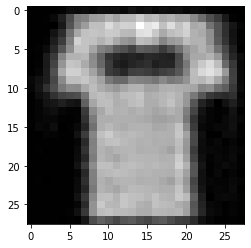

In [58]:
plt.imshow(output[1], cmap="gray")

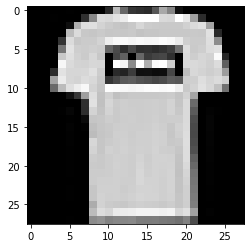

In [60]:
plt.imshow(X_train_mod[1], cmap="gray")

In [ ]:
encode = encoder.predict(X_train_mod)

In [ ]:
decode = decoder.predict(encode)